In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### No null values

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

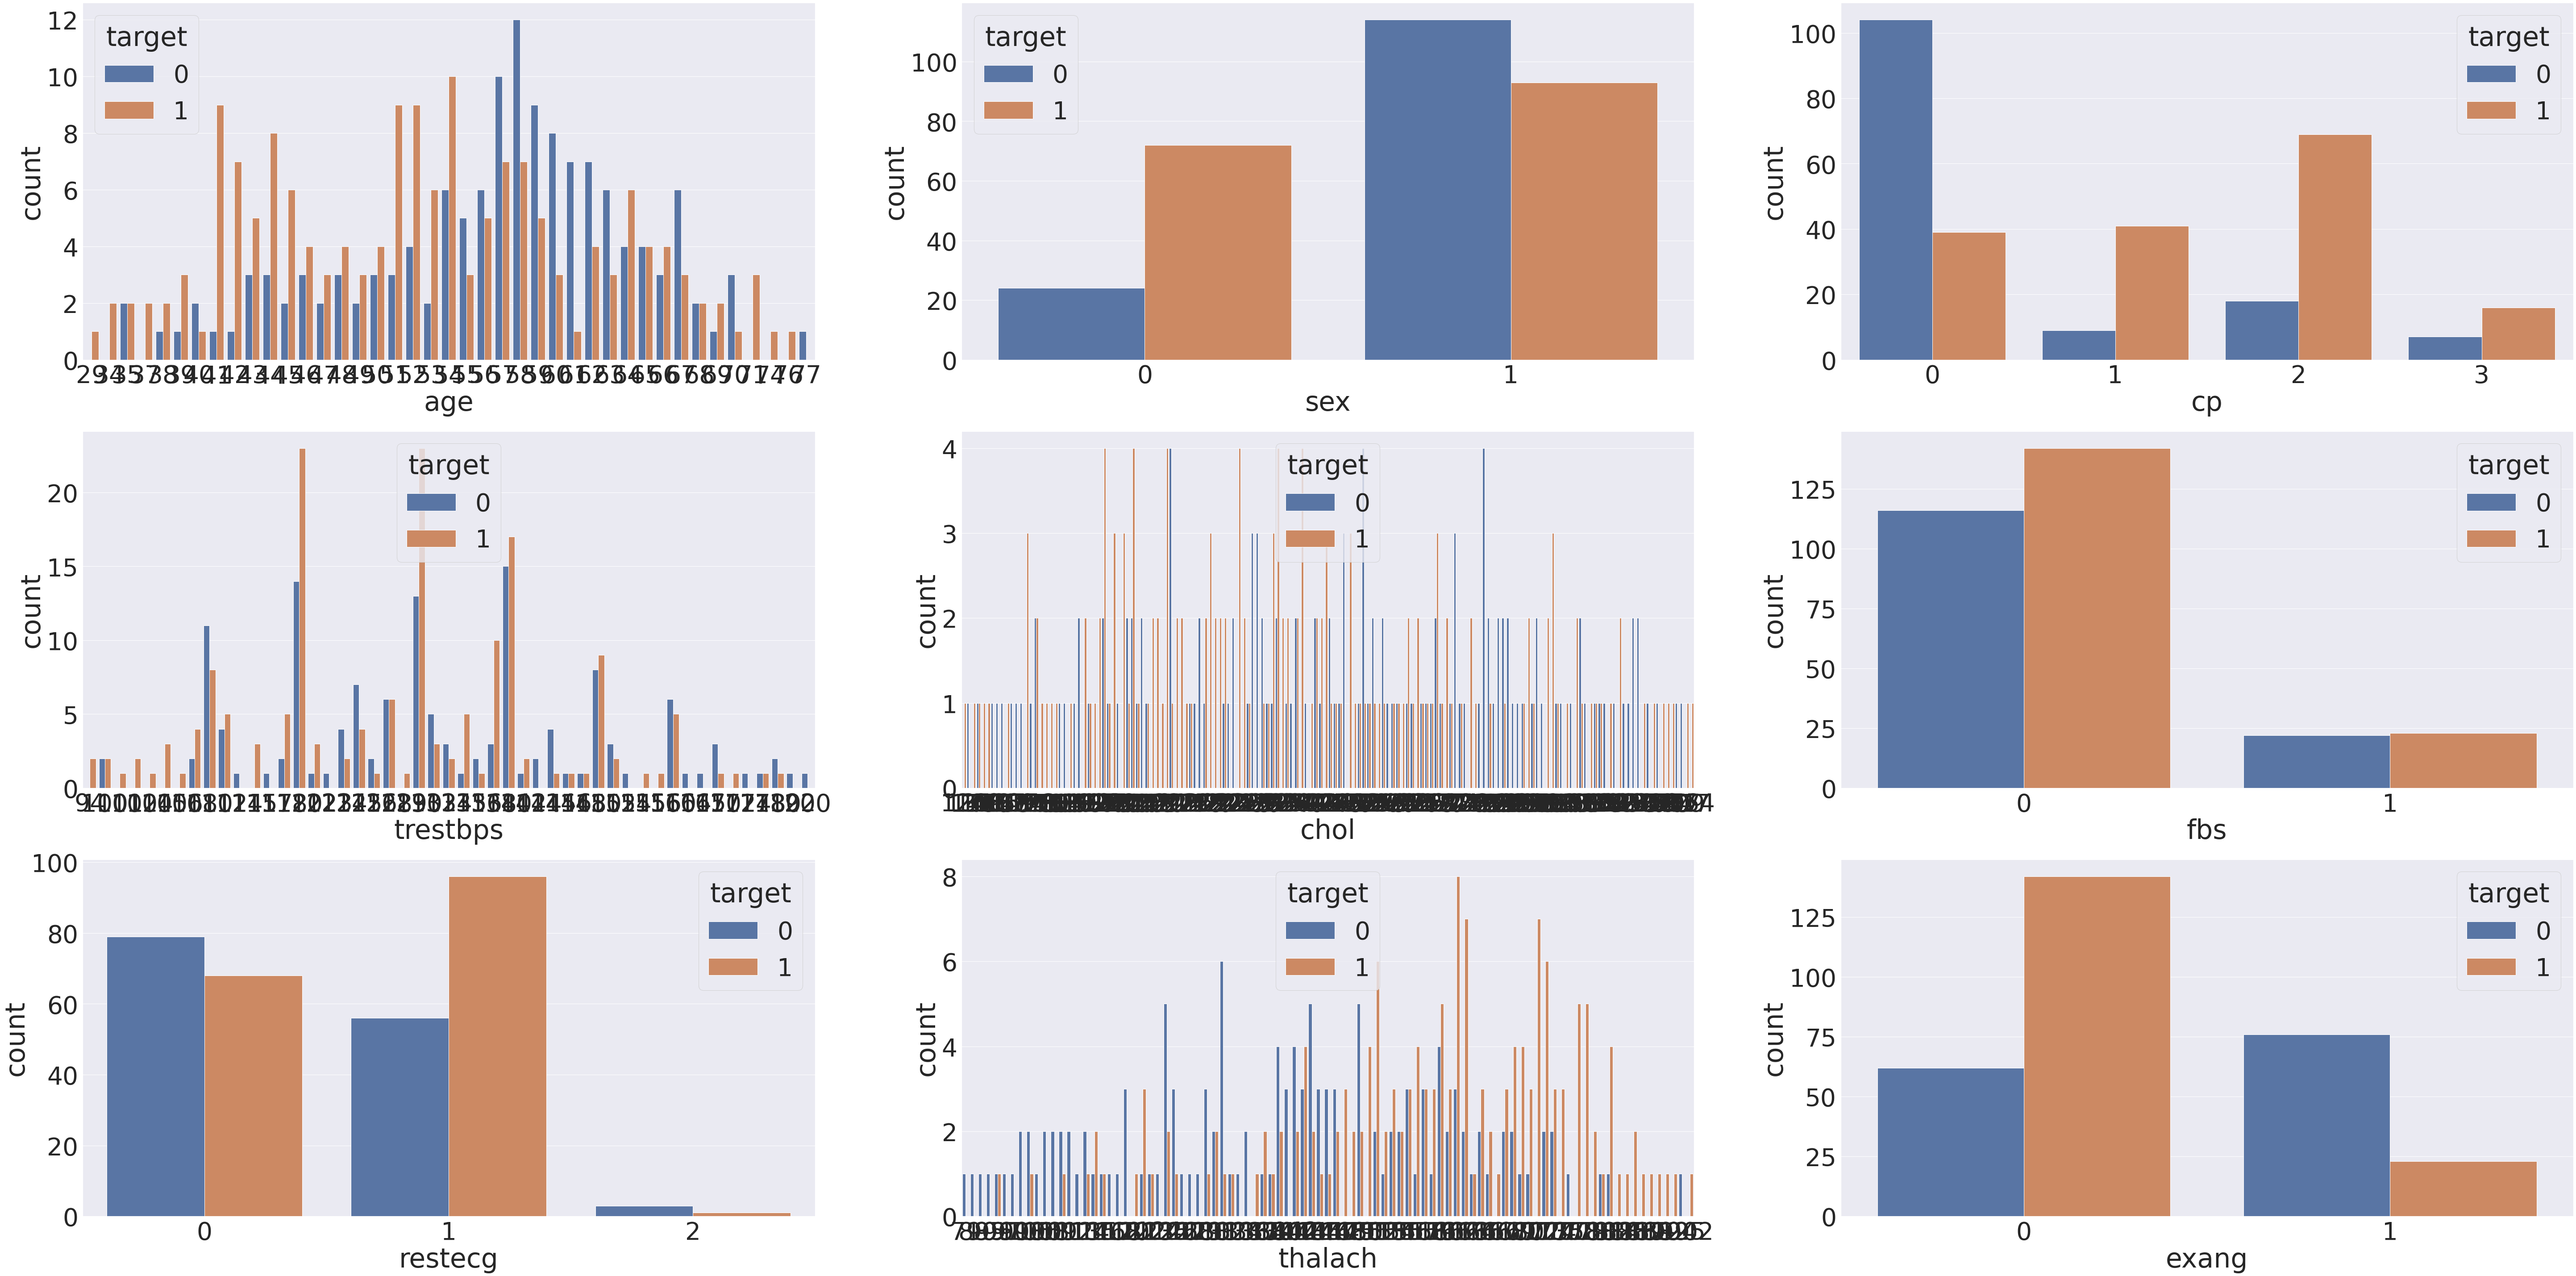

In [ ]:
#Comparison between Target and other factor
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(df['age'], hue=df['target'])

plt.subplot(332)
sns.countplot(df['sex'], hue=df['target'])

plt.subplot(333)
sns.countplot(df['cp'], hue=df['target'])

plt.subplot(334)
sns.countplot(df['trestbps'], hue=df['target'])

plt.subplot(335)
sns.countplot(df['chol'], hue=df['target'])

    

plt.subplot(336)
sns.countplot(df['fbs'], hue=df['target'])

plt.subplot(337)
sns.countplot(df['restecg'], hue=df['target'])

plt.subplot(338)
sns.countplot(df['thalach'], hue=df['target'])

plt.subplot(339)
sns.countplot(df['exang'], hue=df['target'])


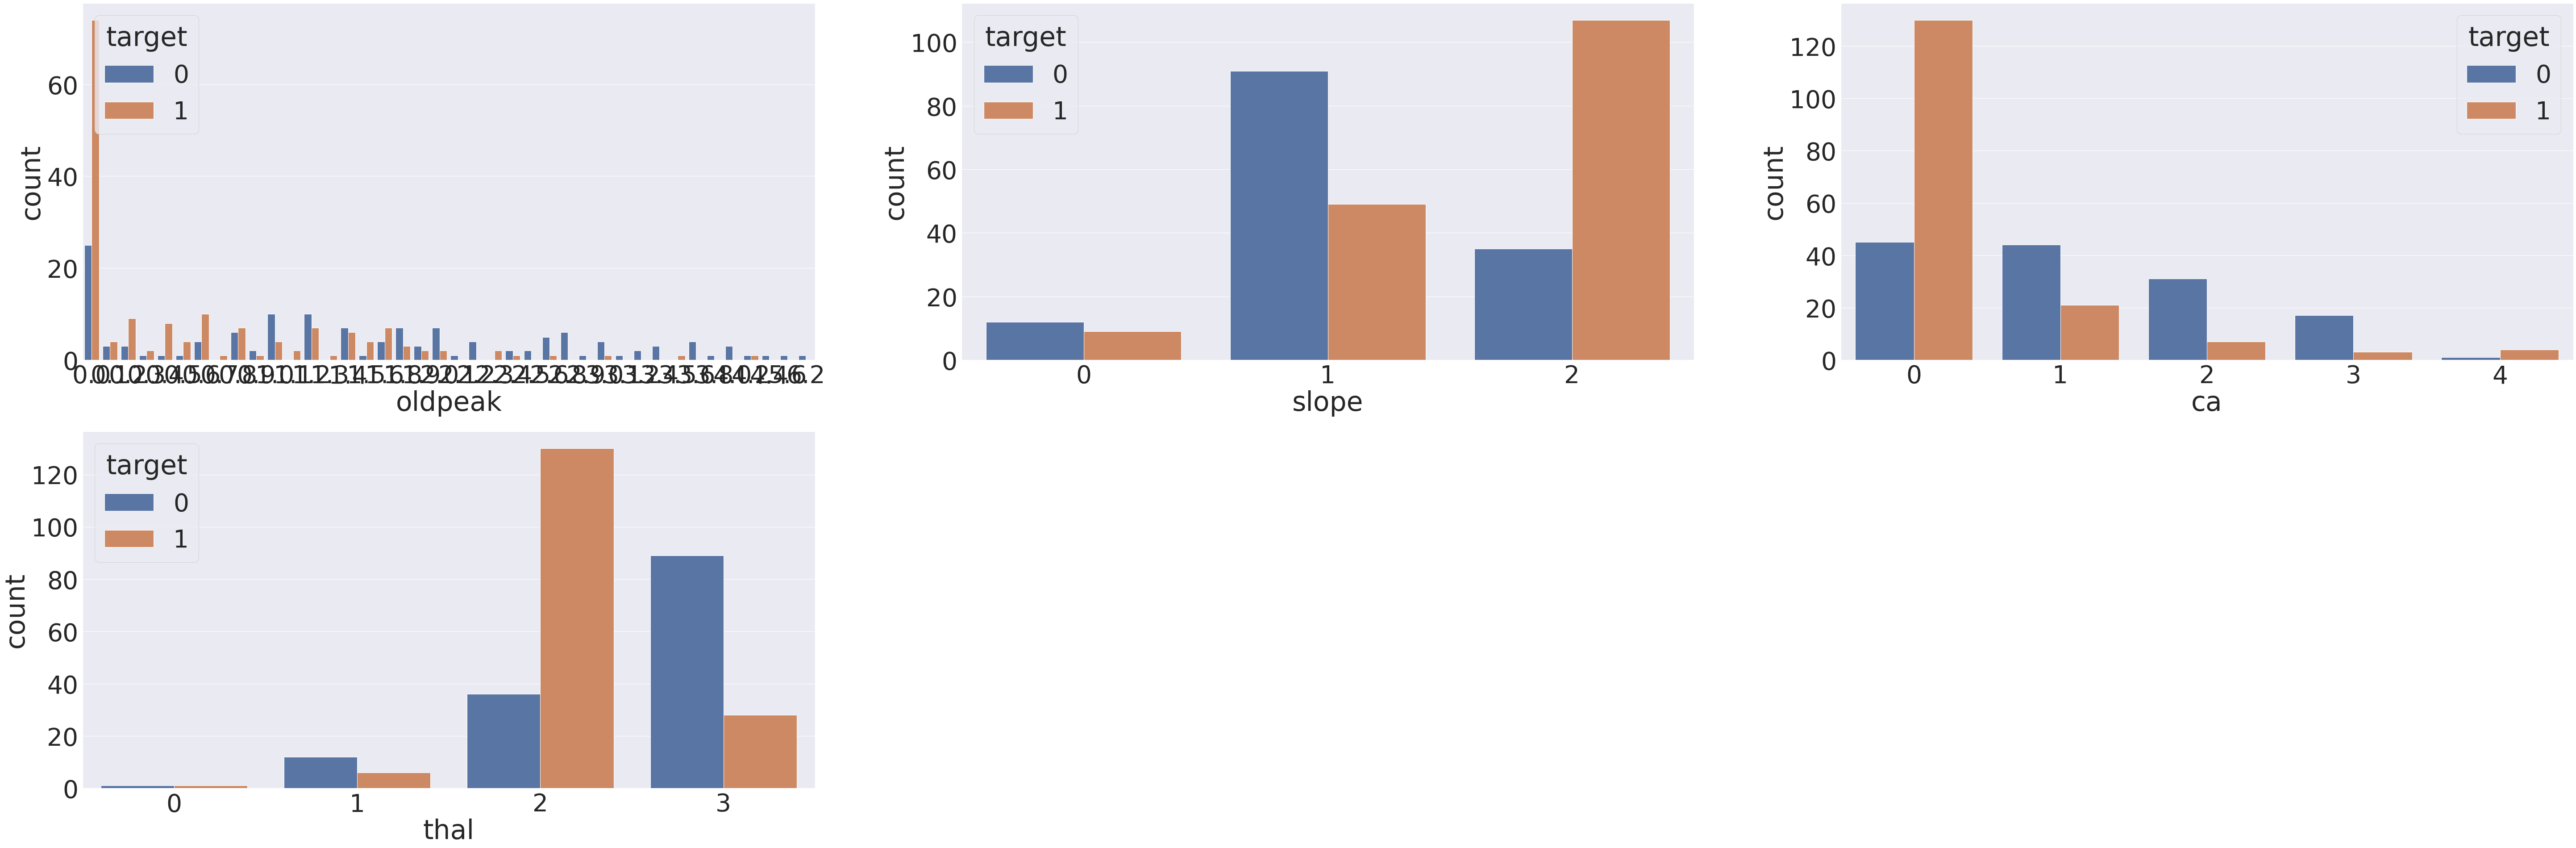

In [ ]:
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(df['oldpeak'], hue=df['target'])

plt.subplot(332)
sns.countplot(df['slope'], hue=df['target'])

plt.subplot(333)
sns.countplot(df['ca'], hue=df['target'])

plt.subplot(334)
sns.countplot(df['thal'], hue=df['target'])

If we have any value in data type other than numeric, then we need encode it by following code

*`df.sex=df.sex.map({'Male':1, 'Female':0})`*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

X = df.drop(columns='target')
y= df['target']
X_train , X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2)

In [ ]:
one= OneHotEncoder()
one.fit(X[[ "age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca", "thal"]])
one.categories_

[array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 74, 76, 77]),
 array([0, 1]),
 array([0, 1, 2, 3]),
 array([ 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117,
        118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135,
        136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156,
        160, 164, 165, 170, 172, 174, 178, 180, 192, 200]),
 array([126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174,
        175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192,
        193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
        221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
        234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247,
        248, 249, 250, 252, 253, 254, 255, 256, 257, 25

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(one.categories_, sparse=True), (["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca", "thal"])), remainder="passthrough")

In [ ]:
lr=LogisticRegression()
pipe=make_pipeline(column_trans, lr)
pipe.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 74, 76, 77]),
                                                                            array([0, 1])...
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])],
                                   verbose=False)),
                ('logisticregression',
              

In [ ]:
y_pred=pipe.predict(X_test)
r2_score(Y_test, y_pred)

0.39

In [ ]:
scores=[]
for i in range(1000):
  X_train , X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=i)
  lr=LogisticRegression()
  pipe=make_pipeline(column_trans,lr)
  pipe.fit(X_train, Y_train)
  y_pred=pipe.predict(X_test)
  scores.append(r2_score(Y_test, y_pred))

In [ ]:
np.argmax(scores)

807

In [ ]:
scores[np.argmax(scores)]

0.7359307359307359

In [ ]:
X_train , X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=np.argmax(scores))
lr=LogisticRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train, Y_train)
y_pred=pipe.predict(X_test)
r2_score(Y_test,y_pred)

0.7359307359307359

In [ ]:
pipe.predict(pd.DataFrame([[50,1,3,132,230,1,0,145,0,2.2,0,0,1]], columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca", "thal"]))

array([1])